In [1]:
# loction
import os
os.getcwd()

'C:\\Users\\Shree'

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#inline statement - displays the graphs in the current notebook
%matplotlib inline
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing

In [3]:
df = pd.read_csv('data_2_var.csv')
df

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [4]:
df.describe()

,-122.7406674,-130.5720846
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


In [13]:
print(df.rename(columns={'-122.7406674': 'A', '-130.5720846': 'B'}))

               A           B
0    -121.531419 -129.938929
1    -134.917019 -130.141832
2    -120.605951 -125.760932
3    -129.894781 -112.785214
4    -134.366669 -116.000000
...          ...         ...
1105 -115.366669  121.000000
1106 -119.954237  123.609122
1107 -109.942155  127.197394
1108 -111.515368  128.170885
1109 -110.344221  123.087950

[1110 rows x 2 columns]


# Preprocessing

In [15]:
df.columns

Index(['-122.7406674', '-130.5720846'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -122.7406674  1110 non-null   float64
 1   -130.5720846  1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [17]:
df.dtypes

-122.7406674    float64
-130.5720846    float64
dtype: object

In [18]:
df.isna().sum()

-122.7406674    0
-130.5720846    0
dtype: int64

# EDA

### Check Outliers

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


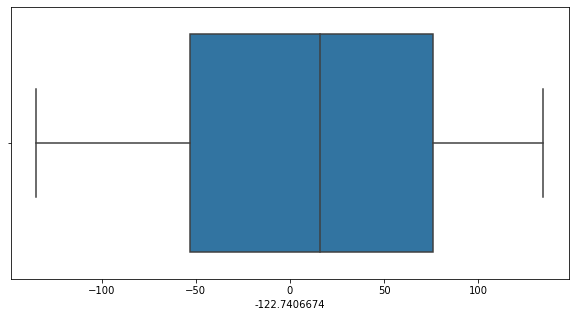

In [22]:
plt.figure(figsize=[10,5])
sns.boxplot(df['-122.7406674'])
plt.show()

In [31]:
Q1 = df['-122.7406674'].quantile(0.25)
Q3 = df['-122.7406674'].quantile(0.75)
Q1,Q3

(-53.3666687, 76.19390685)

In [32]:
IQR = Q3 - Q1
IQR

129.56057555

In [33]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-247.707532025, 270.534770175)

In [39]:
df[(df['-122.7406674']<lower_limit)|(df['-122.7406674']>upper_limit)]

,-122.7406674,-130.5720846
1066,134.605775,123.61968


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


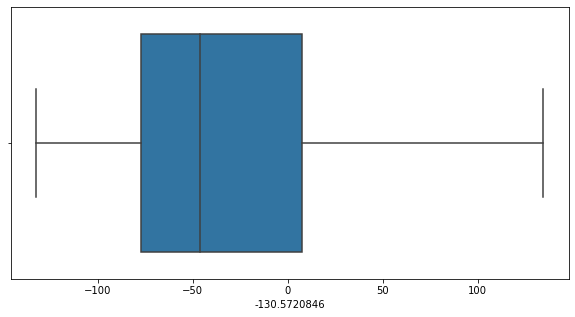

In [23]:
plt.figure(figsize=[10,5])
sns.boxplot(df['-130.5720846'])
plt.show()

In [34]:
Q1 = df['-130.5720846'].quantile(0.25)
Q3 = df['-130.5720846'].quantile(0.75)
Q1,Q3

(-76.99429755, 7.598959891)

In [35]:
IQR = Q3 - Q1
IQR

84.59325744099999

In [36]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-203.8841837115, 134.48884605249998)

In [38]:
df[(df['-130.5720846']<lower_limit)|(df['-130.5720846']>upper_limit)]

,-122.7406674,-130.5720846


# Remove Outliers

In [43]:
cols = ['-122.7406674','-130.5720846'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
df.shape

(1110, 2)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='-130.5720846', ylabel='Density'>

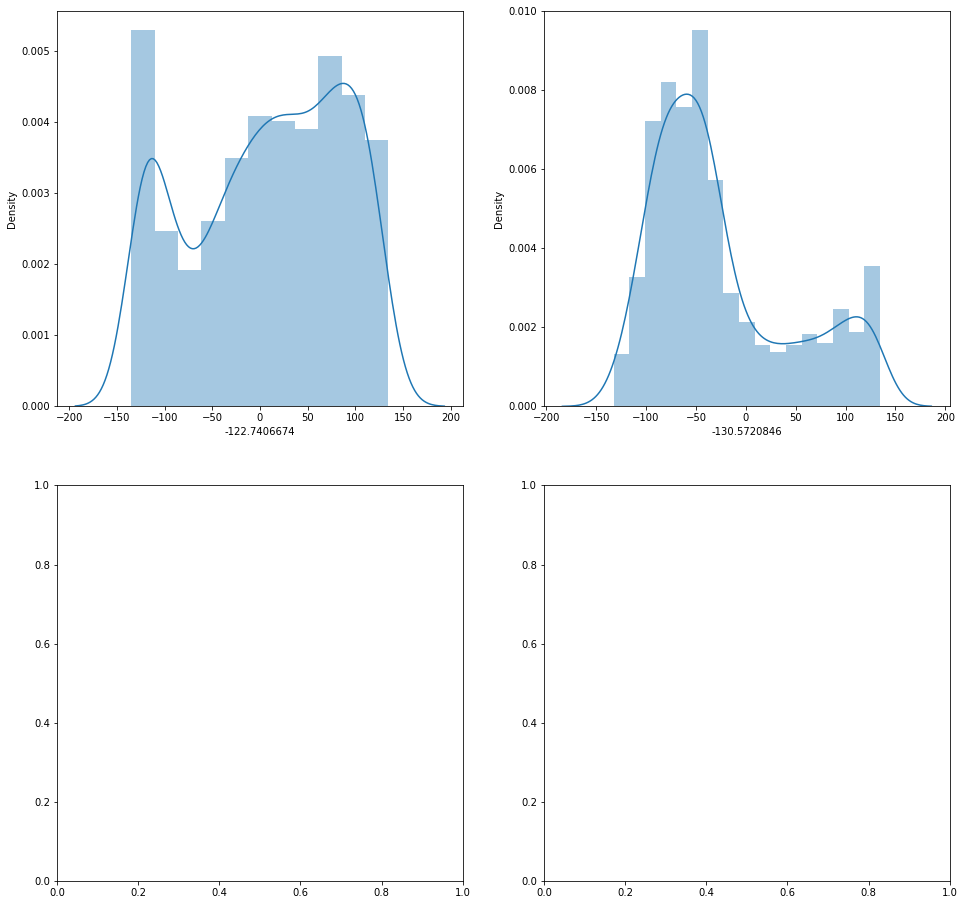

In [51]:
fig, ax2 = plt.subplots(2,2, figsize=(16, 16))
sns.distplot(df['-122.7406674'],ax=ax2[0][0])
sns.distplot(df['-130.5720846'],ax=ax2[0][1])

In [52]:
df.corr()

,-122.7406674,-130.5720846
-122.7406674,1.000000,0.454607
-130.5720846,0.454607,1.000000


## Split the data into test and train data sets

In [59]:
X = df.loc[:,df.columns!="-122.7406674"]
type(X)

pandas.core.frame.DataFrame

In [60]:
X.head()

,-130.5720846
0,-129.938929
1,-130.141832
2,-125.760932
3,-112.785214
4,-116.000000


In [61]:
X.shape

(1110, 1)

In [62]:
y = df.loc[:,df.columns!="-130.5720846"]
type(y)

pandas.core.frame.DataFrame

In [63]:
y.head()

,-122.7406674
0,-121.531419
1,-134.917019
2,-120.605951
3,-129.894781
4,-134.366669


In [64]:
y.shape

(1110, 1)

In [65]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test, = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [66]:
# Check for the sampled data
print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)

(832, 1)
(832, 1)
(278, 1)
(278, 1)


# Regressions
** Multiple Linear Regression**

In [71]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_Train, y_Train)

LinearRegression()

In [73]:
import statsmodels.api as sm
X = df[['-122.7406674']]
Y = df['-130.5720846']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           -130.5720846   R-squared (uncentered):                   0.155
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              203.5
Date:                Sat, 18 Jun 2022   Prob (F-statistic):                    1.61e-42
Time:                        16:04:22   Log-Likelihood:                         -6265.7
No. Observations:                1110   AIC:                                  1.253e+04
Df Residuals:                    1109   BIC:                                  1.254e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
-122.7406674     0.3683      0.026     14.266      0.000       0.318       0.419
==============================================================================
Omnibus:                      220.423   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.199
Skew:                           1.204   Prob(JB):                     1.25e-87
Kurtosis:                       4.690   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Features and their respective coefficients
coeffs_data = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_data.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
0,-122.7406674,[0.5192575871797661]


Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

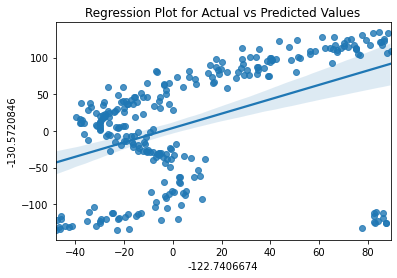

In [76]:
g = sns.regplot(x=lm.predict(X_Test), y=y_Test, fit_reg=True)
g.set(xlabel='-122.7406674', ylabel='-130.5720846', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

In [78]:
# R2 for train and test data
R2_reg_train = lm.score(X_Train,y_Train)
R2_reg_test = lm.score(X_Test,y_Test)
print('R squared for train data is: %.3f' %(R2_reg_train))
print('R squared for test data is: %.3f' %(R2_reg_test))

R squared for train data is: 0.201
R squared for test data is: 0.219


In [80]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((y_Train - lm.predict(X_Train))**2))
RMSE_reg_test = sqrt(np.mean((y_Test - lm.predict(X_Test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 70.748
Root mean sqaured error for test data is: 70.267


# Lasso Regression

In [81]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for LassoCV
lasso_reg = LassoCV(alphas=alphas, cv=None, max_iter=50000, tol=0.1,selection='random')
# Fit the model to our training data
lasso_reg.fit(X_Train,y_Train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
        max_iter=50000, selection='random', tol=0.1)

In [82]:
# R2 for train and test data respectively
R2_train = (lasso_reg.score(X_Train, y_Train))
R2_test = (lasso_reg.score(X_Test,y_Test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))

R squared for train data is: 0.201
R squared for test data is: 0.219


In [85]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((y_Train - lm.predict(X_Train))**2))
RMSE_reg_test = sqrt(np.mean((y_Test - lm.predict(X_Test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 70.748
Root mean sqaured error for test data is: 70.267


Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

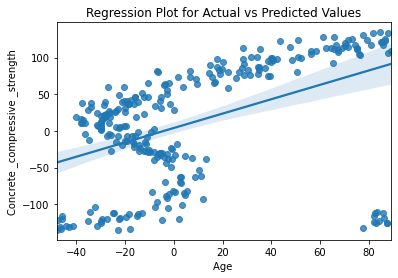

In [86]:
# Regression plot
g = sns.regplot(x=lasso_reg.predict(X_Test), y=y_Test, fit_reg=True)
g.set(xlabel='Age ', ylabel='Concrete _compressive _strength', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

# DecisionTree

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
dtr = DecisionTreeRegressor(ccp_alpha=0.0)
model5 = dtr.fit(X_Train,y_Train)
predictions5 = dtr.predict(X_Test)
m5=model5.score(X_Test,y_Test )
RMSE5=np.sqrt(metrics.mean_squared_error(y_Test, predictions5))
print('Accuracy of model is', model5.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions5)))

Accuracy of model is 0.2187907706491704
Mean Absolute Error: 45.291920734653836
Mean Squared Error: 4940.505827451041
Root Mean Squared Error: 70.28873186685787


# SVM regression

In [96]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import metrics
svm= svm.SVR(kernel='linear')
model7 = svm.fit(X_Train, y_Train)
predictions7 = svm.predict(X_Test)
m7=model7.score(X_Test, y_Test)
RMSE7=np.sqrt(metrics.mean_squared_error(y_Test, predictions7))
print('Accuracy of model is', model7.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions7))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions7)))

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of model is 0.10465477286467473
Mean Absolute Error: 51.35921257298238
Mean Squared Error: 5662.322136053567
Root Mean Squared Error: 75.24840288041712


# Random forest regression

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rnd = RandomForestRegressor(ccp_alpha=0.0)
model4 = Rnd.fit(X_Train, y_Train)
predictions4 = Rnd.predict(X_Test)
m4=model4.score(X_Test, y_Test)
RMSE4=np.sqrt(metrics.mean_squared_error(y_Test, predictions4))
print('Accuracy of model is', model4.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions4)))

<ipython-input-97-0154083b17fb>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4 = Rnd.fit(X_Train, y_Train)


Accuracy of model is 0.36795485747288237
Mean Absolute Error: 44.65096967142825
Mean Squared Error: 3997.165666440206
Root Mean Squared Error: 63.22314185834335


# KNN regression

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=2)
model6 = knn.fit(X_Train, y_Train)
predictions6 = knn.predict(X_Test)
m6=model6.score(X_Test, y_Test)
RMSE6=np.sqrt(metrics.mean_squared_error(y_Test, predictions6))
print('Accuracy of model is', model6.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions6)))

Accuracy of model is 0.2926297741509394
Mean Absolute Error: 47.2991157497518
Mean Squared Error: 4473.534863223172
Root Mean Squared Error: 66.88448895837638


# Model Comparison through RMSE

In [99]:
data='height'

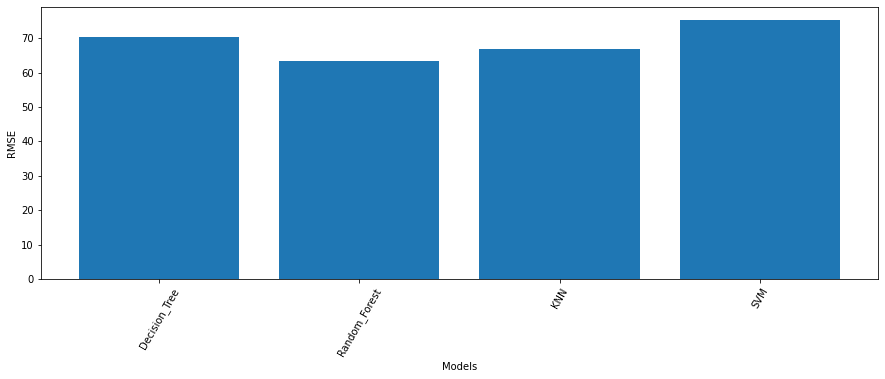

In [100]:
# Model Comparison
height = [ RMSE5, RMSE4, RMSE6, RMSE7]
bars = ['Decision_Tree','Random_Forest', 'KNN', 'SVM']
plt.figure(figsize=(15,5))
plt.bar(bars,height)
plt.xticks(rotation=60)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Hyperparameter Tuning

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.feature_selection import RFE

model=RandomForestRegressor()

In [103]:
clf=RandomForestRegressor()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [104]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[1,10,100,200,400,1000]
max_features=['auto','sqrt']
max_depth=[3,6,10]
min_samples_leaf=[1,2,4,10]

random_grid= {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf}

In [105]:
clf=RandomForestRegressor()
clf_random_grid=RandomizedSearchCV(estimator=clf, param_distributions=random_grid, cv=5, verbose=2)

clf_random_grid.fit(X_Train,y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=400; total time=   0.5s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=400; total time=   0.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=400; total time=   0.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=400; total time=   0.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=10, n_estimators=400; total time=   0.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=   1.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=   2.0s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=1000; total time=   1.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=1; total time=   0.0s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.3s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.3s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.3s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.3s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=1; total time=   0.0s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=400; total time=   0.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=400; total time=   0.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=400; total time=   0.8s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=400; total time=   0.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=1; total time=   0.0s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=1000; total time=   1.8s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=1000; total time=   1.9s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=1000; total time=   1.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=1000; total time=   1.6s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=1000; total time=   1.7s


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 6, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'n_estimators': [1, 10, 100, 200, 400,
                                                         1000]},
                   verbose=2)

In [106]:
clf_random_grid.best_params_

{'n_estimators': 400,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 3}

In [108]:
y_pred=clf_random_grid.predict(X_Test)

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
model_tune=RandomForestRegressor()

In [111]:
tune_parameter= {
                'n_estimators':[200,500],
                'max_features':['auto','sqrt','log2'],
                'max_depth':[4,5,6,7,8],
                #'criterion':['gini','entropy']

                }


In [112]:
clf_random_grid=GridSearchCV(estimator=model_tune, param_grid=tune_parameter, cv=5)

In [115]:
clf_random_grid.fit(X_Train,y_Train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [120]:
clf_random_grid.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}

In [123]:
model_final=RandomForestRegressor(n_estimators=30, max_depth=10,  max_features='log2')

In [125]:
model_final.fit(X_Train, y_Train)

<ipython-input-125-3586240bfc31>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_final.fit(X_Train, y_Train)


RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=30)

In [127]:
y_pred=model_final.predict(X_Test)

In [128]:
features= pd.DataFrame()
features['Feature']=X.columns

In [129]:
features.head()

,Feature
0,-122.7406674


In [130]:
model_final.feature_importances_

array([1.])

In [131]:
features['Support'] = model_final.feature_importances_

In [132]:
features.head()

,Feature,Support
0,-122.7406674,1.0


In [133]:
features.sort_values('Support',ascending=False,inplace=True)
features.set_index('Feature',inplace=True)

<AxesSubplot:ylabel='Feature'>

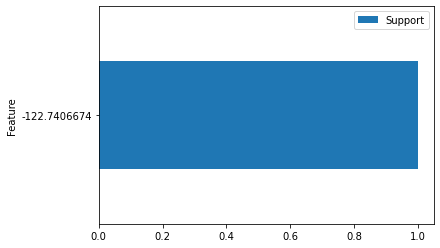

In [134]:
features.plot(kind='barh')